# Lab 5: Pandas and Principle Component Analysis

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [8,8]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2
%matplotlib notebook

 

## Task 1:  Introduction to Pandas

We are going to be using Pandas, covariance matrices and principle component analysis to explore a dataset on breast cancer diagnosis data. More information about the dataset can be found [here.](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from the url: "https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv".
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation, in one method call get the shape and print the results.
2. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to get the column headers and print them.
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation, in one method call get the first 5 items and print the results.
2. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation, find the mean of each column
    1. Are there any columns that pandas did not calculate the mean for?  Why?
3. Use [Dataframe.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) to replace the values in the diagnosis column with integers values and assign the result to a new dataframe.
    1. Create and use a dictionary of the current values and what they should be replaced by.
    2. "M" should be replaced with 1 and "B" should be replaced with 0.
    2. Use the inplace parameter to replace the values in the dataframe.
    4. Print the first 5 items of the updated dataframe's diagnosis column to make sure that the replace worked correctly
4. Create a cancer_x dataframe which includes all the columns except for "id", "diagnosis" and "Unnamed"
4. Update cancer_x to be normalized from 0-1, by subtracting by the minimum and dividing by the range. 

In [3]:
url="https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
d = {'M': 1, 'B': 0}
cancer_data = pd.read_csv(url)
print("Shape: ",cancer_data.shape)
print("Columns: ",cancer_data.columns)
print("Data:", cancer_data.head())
print("Mean: ",cancer_data.mean())
cancer_data.replace(to_replace=d, inplace=True)
print("Data:", cancer_data['diagnosis'].head())

cancer_x = cancer_data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
cancer_x=(cancer_x-cancer_x.min())/(cancer_x.max()-cancer_x.min())
cancer_y = cancer_data['diagnosis']


Shape:  (569, 33)
Columns:  Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
Data:          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00

## Task 2: Create and Visualize a Covariance Matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the pairwise covariance of the columns, store the resulting covariance matrix, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. rotating the text using setp
        2. adjusting the margins with subplots_adjust
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the cmap parameter for imshow
        2. Switch the direction by appending \_r to the end of the colormap name
    4. Include the colorbar.
3. What interpretations can you draw from this covariance matrix?

(30, 30)


<IPython.core.display.Javascript object>


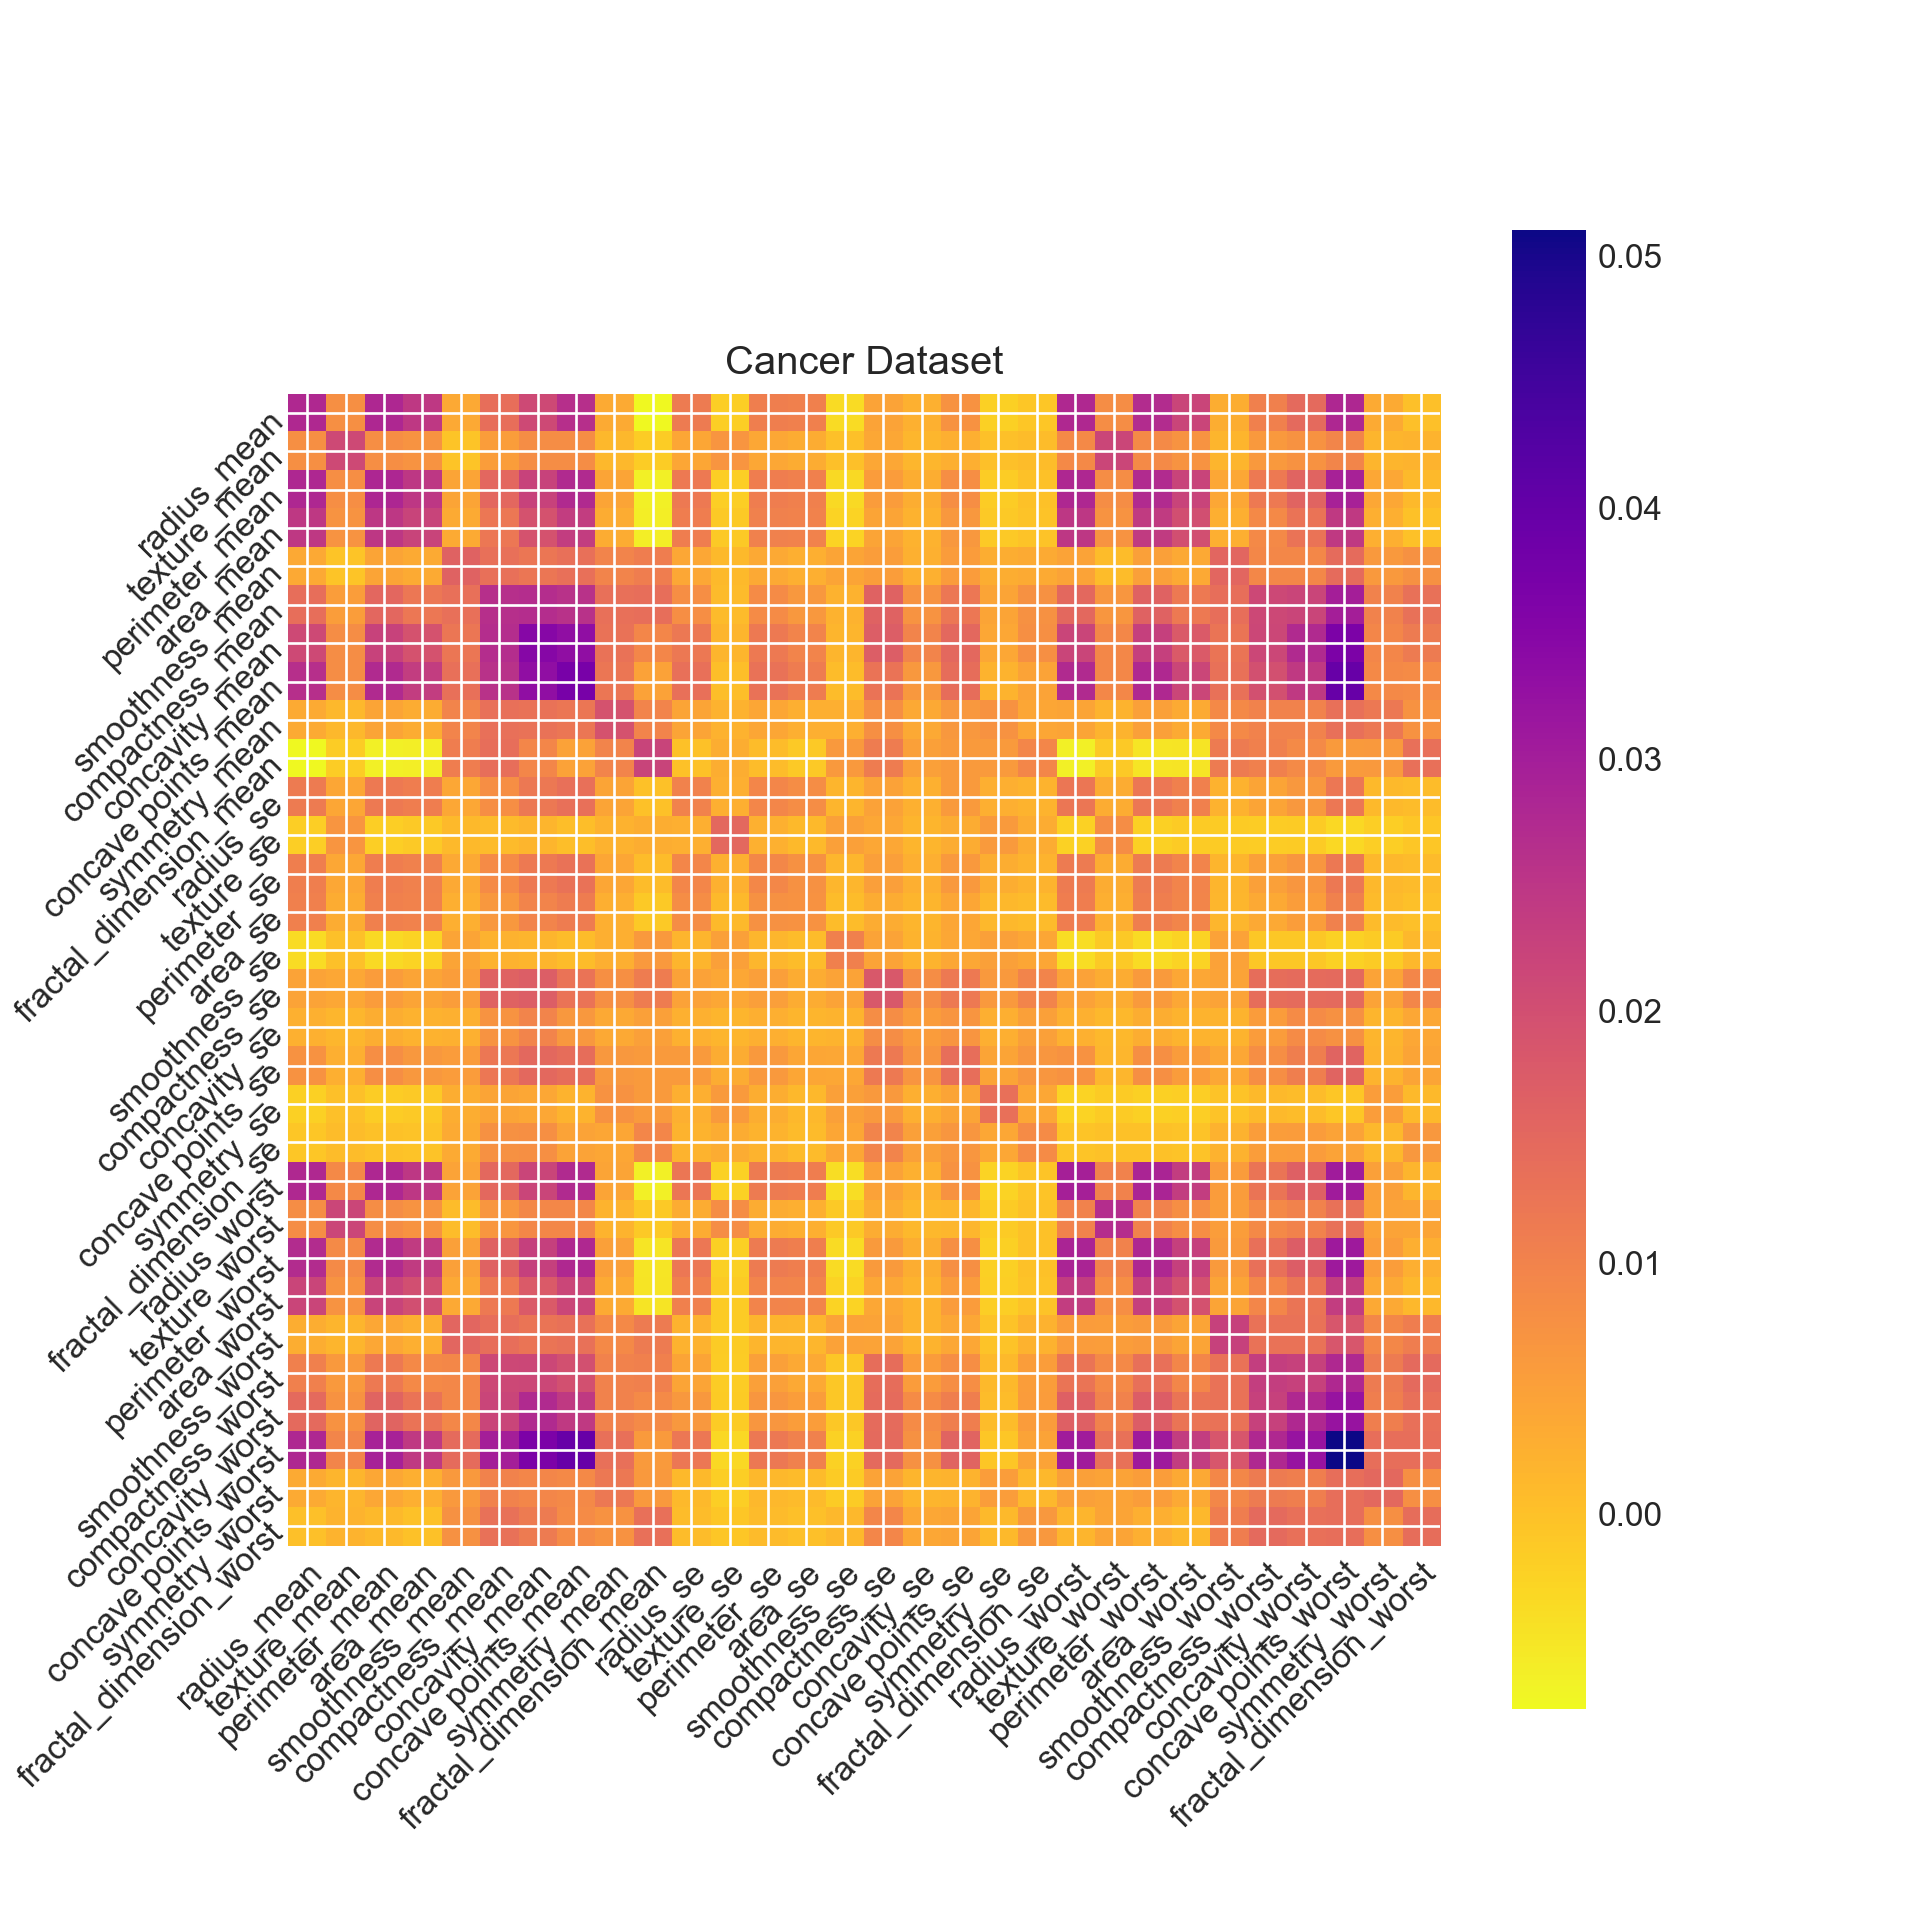

In [78]:
cov = cancer_x.cov()
print(cov.shape)
fig, ax = plt.subplots()
plt.title("Cancer Dataset")
ax.set_xticks(np.arange(len(cancer_x.columns)))
ax.set_yticks(np.arange(len(cancer_x.columns)))
ax.set_xticklabels(list(cancer_x.columns))
ax.set_yticklabels(list(cancer_x.columns))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.subplots_adjust(left=.15)
im = ax.imshow(cov, cmap="plasma_r")
cbar = ax.figure.colorbar(im, ax=ax)
plt.show()

## Task 3: Principle Component Analysis

1. Use [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) to compute the eigenvalues and right eigenvectors of the covariance matrix.  Print the eigen_vectors shape and eigen_values.
2. Transform the data with the eigen_vectors.
    1. Matrix multiple cancer_x with the first two columns of the eigen_vectors. 
    2. Print the first 5 rows of the transformed data.
2. Graph a scatterplot of the transformed data using plt.scatter
    1. Scatter Parameters
        1. Graph the first principle component on the x axis (first column of the tranformed data)
        2. Graph the second principle component on the y axis (second column of the tranformed data)
        3. Use the 'diagnosis' column of your data for the color with a black edgecolor
        4. Use the same cmap from the covariance matrix
    3. Have a title, and axis labels.
    4. Add a custom [legend](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html) using legend_elements. 
        1. Get the handles and labels from legend_elements
        2. Update the labels 0 to 'Benign' and 1 to 'Malignant'
        1. Create a legend with the handles, new labels and a title and place it in the upper right corner.

Eigen values [0.33133 0.10785 0.04439 0.04001 0.0255  0.01917 0.00986 0.00743 0.00617
 0.0059  0.0053  0.00473 0.0041  0.00296 0.00168 0.00161 0.00115 0.00094
 0.00086 0.00066 0.00061 0.00049 0.      0.00002 0.00003 0.00012 0.00021
 0.00027 0.00032 0.00033]
Eigen vectors (30, 30)
Transformed data:
           0         1
0 -2.590770  0.762974
1 -1.666057 -0.220868
2 -2.158371  0.226378
3 -2.204565  1.861168
4 -1.830577  0.033608


<IPython.core.display.Javascript object>


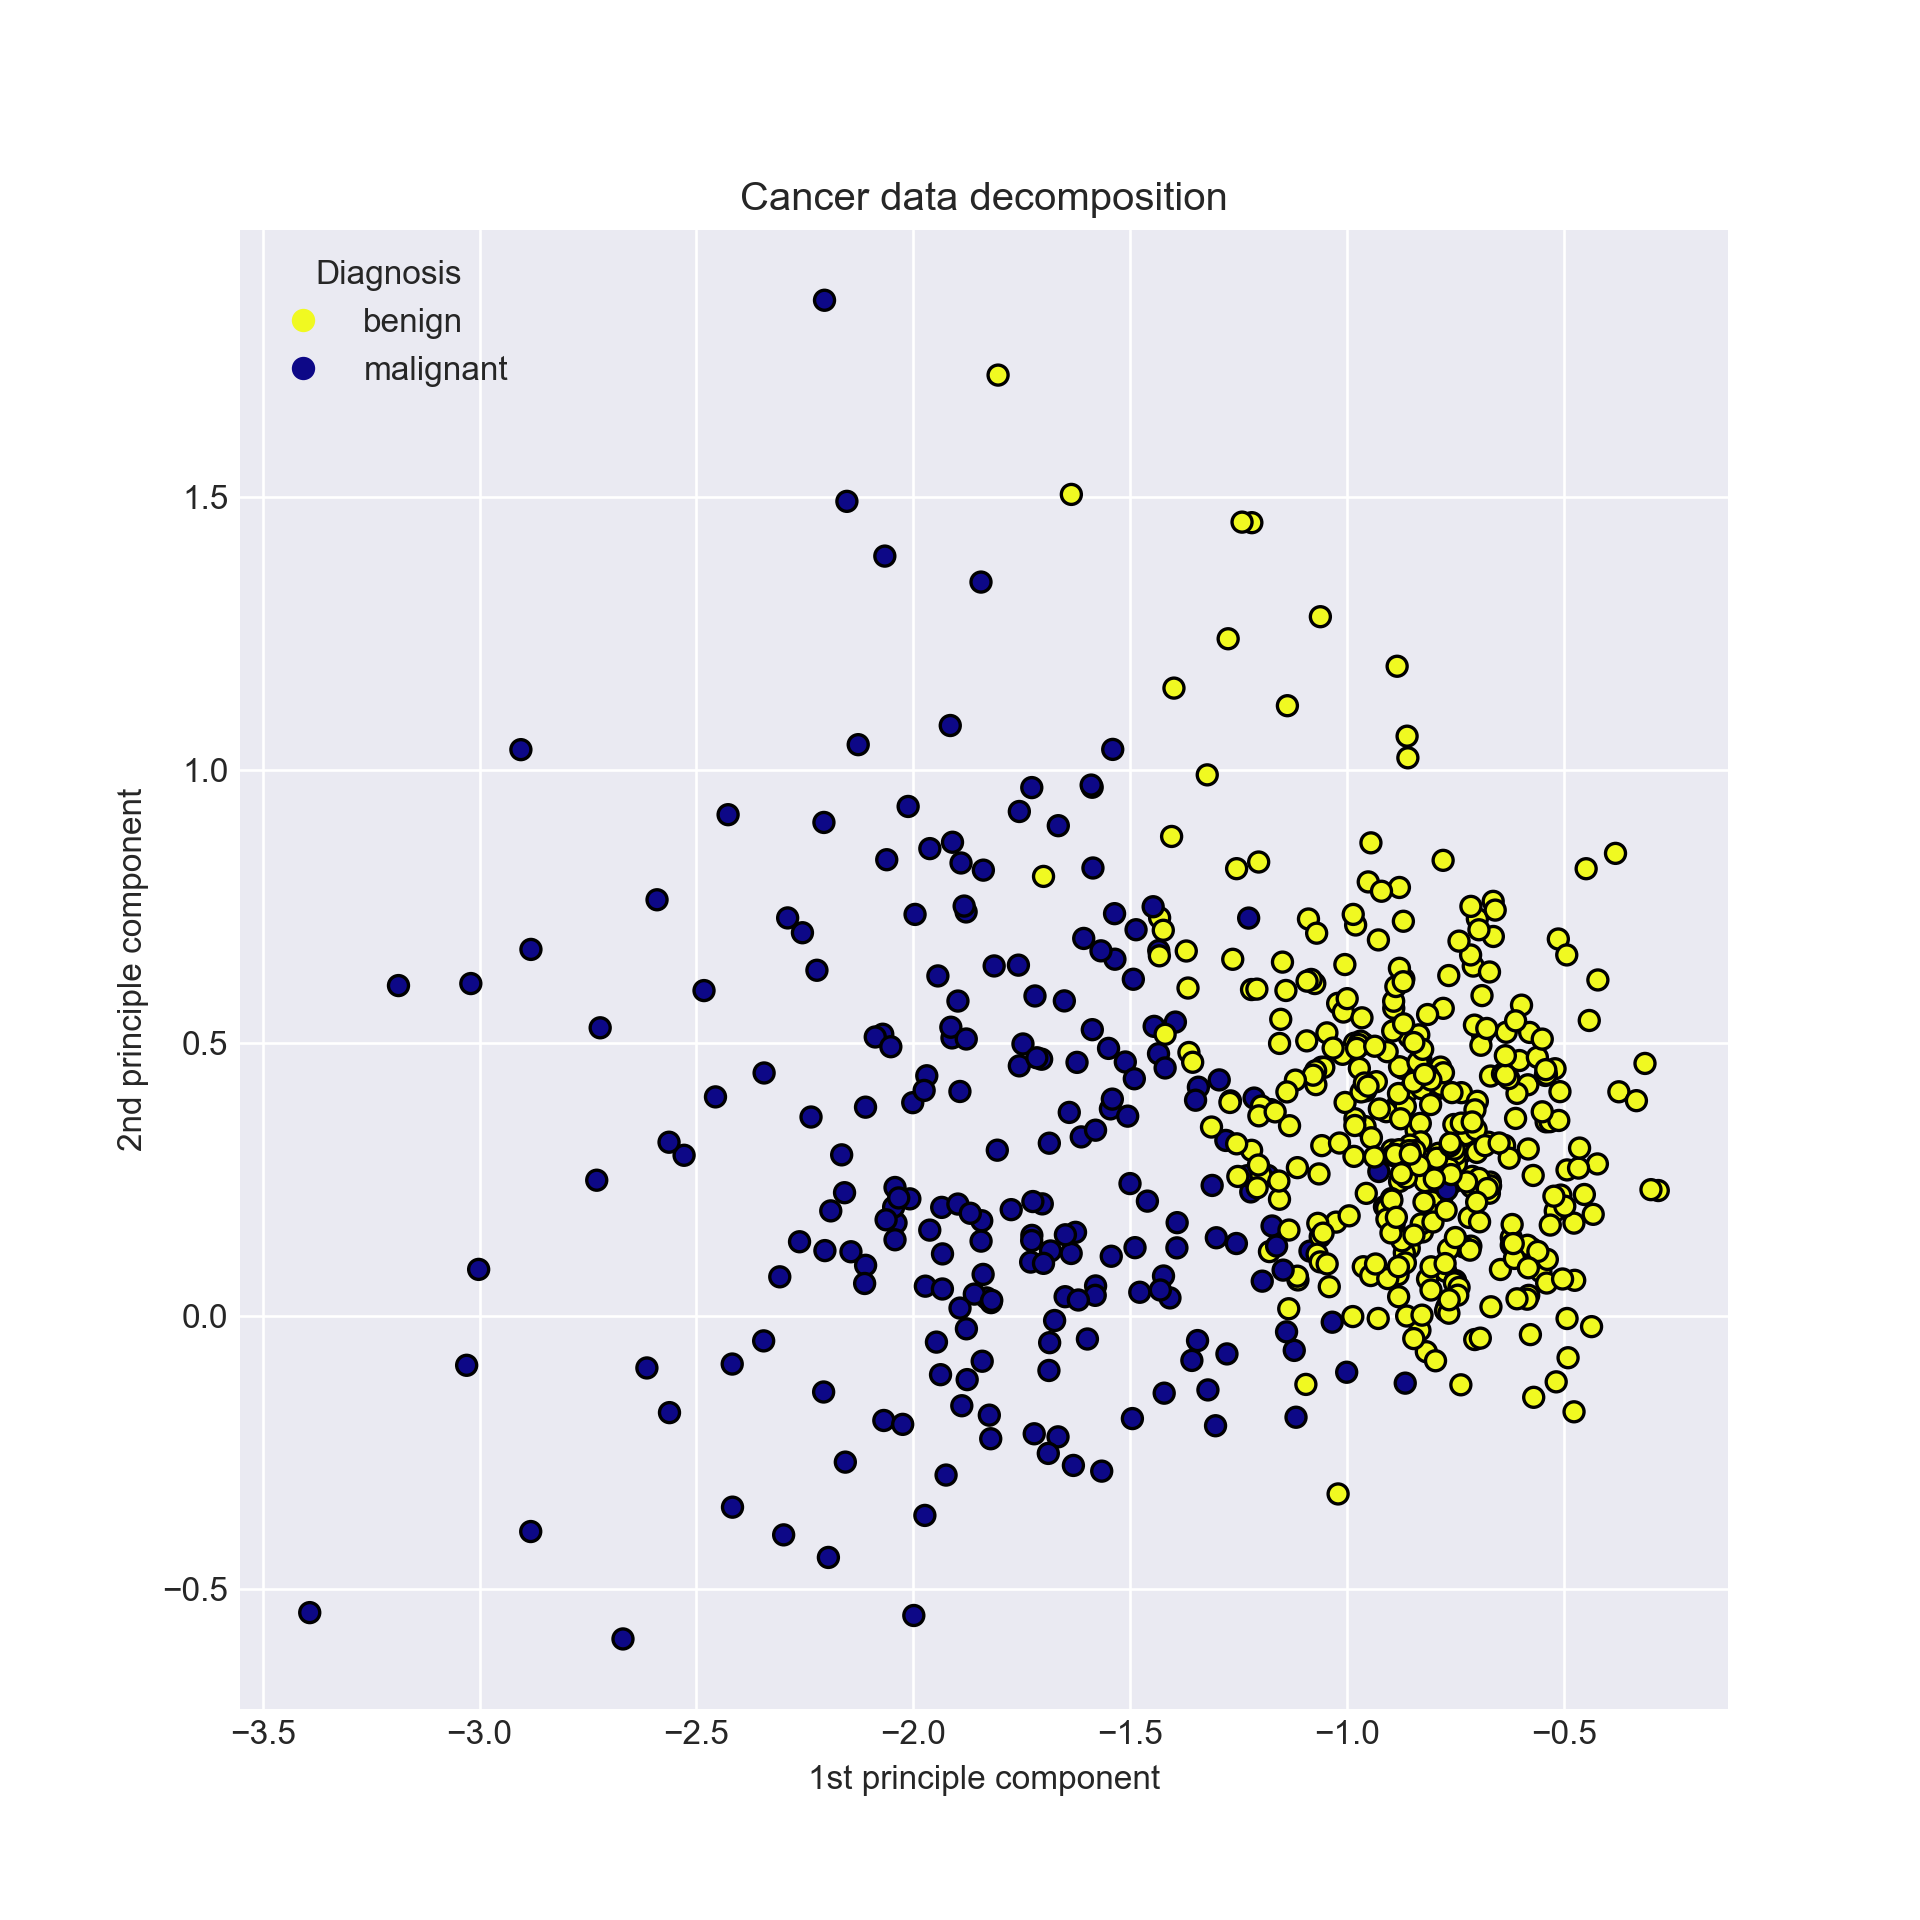

In [85]:
# Eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(cov)
print ("Eigen values", eigen_vals)
print ("Eigen vectors", eigen_vecs.shape)
X_pca = cancer_x@eigen_vecs[:,:2]
print("Transformed data:\n",X_pca.head())

fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[0], X_pca[1], c=cancer_y, cmap="plasma_r", edgecolor='k')
plt.title("Cancer data decomposition")
ax.set_ylabel('2nd principle component')
ax.set_xlabel('1st principle component')
b= {0:"benign",1:"malignant"}
handles, labels = scatter.legend_elements(prop="colors")
labels = ["benign","malignant"]
ax.legend(handles, labels, loc="upper left", title="Diagnosis")
plt.show()

## Task 4: 3D Principle Component Analysis

2. Transform the data with the first 3 eigen_vectors.
    1. Matrix multiple cancer_x with the first 3 columns of the eigen_vectors. 
    2. Print the first 5 rows of the transformed data.
2. Graph a scatterplot of the transformed data using plt.scatter on a [3D figure](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
    1. Scatter Parameters
        1. Graph the first principle component on the x axis (first column of the tranformed data)
        2. Graph the second principle component on the y axis (second column of the tranformed data)
        2. Graph the third principle component on the z axis (third column of the tranformed data)
        3. Use the 'diagnosis' column of your data for the color with a black edgecolor
        4. Use the same cmap from the covariance matrix
    3. Have a title, and axis labels.
    4. Add a [legend](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html) using legend_elements. 
        1. Get the handles and labels from legend_elements
        2. Update the labels 0 to 'Benign' and 1 to 'Malignant'
        1. Create a legend with the handles, new labels and a title and place it in the upper right corner.

Transformed data:
           0         1         2
0 -2.590770  0.762974 -0.223113
1 -1.666057 -0.220868  0.113415
2 -2.158371  0.226378  0.170741
3 -2.204565  1.861168  0.265319
4 -1.830577  0.033608 -0.090746


<IPython.core.display.Javascript object>


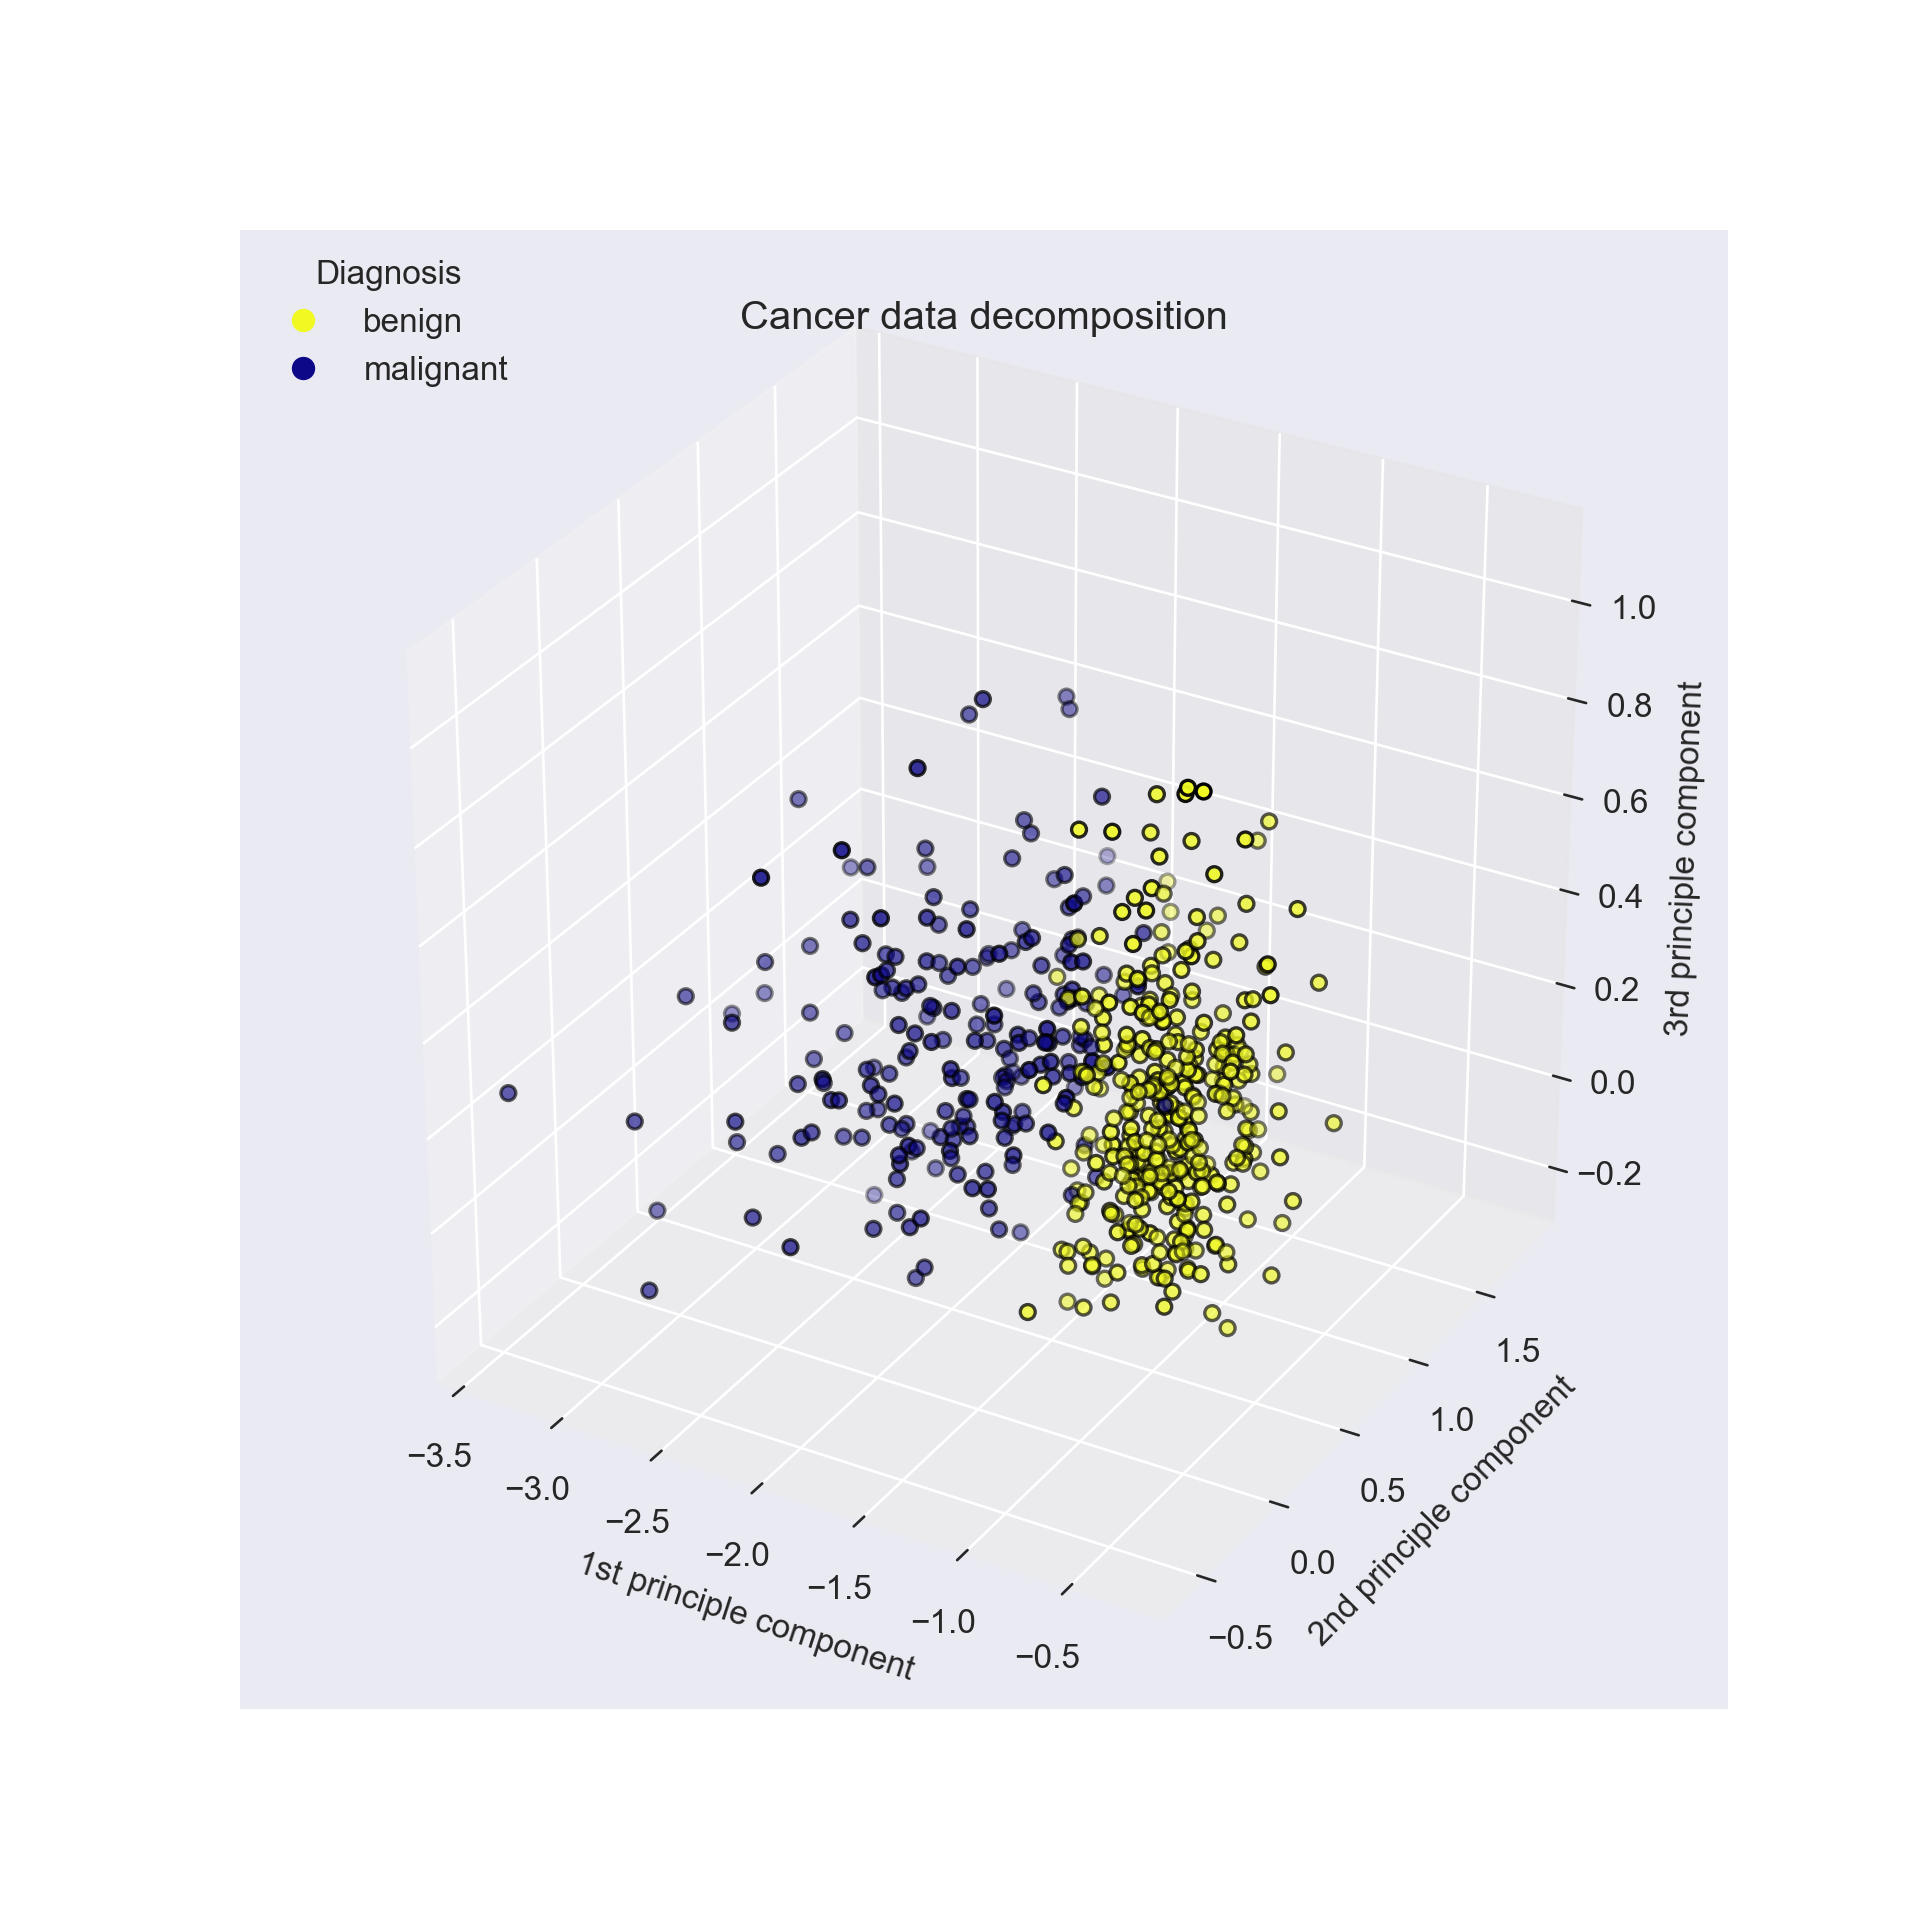

In [87]:
X_pca = cancer_x@eigen_vecs[:,:3]
print("Transformed data:\n",X_pca.head())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(X_pca[0], X_pca[1], X_pca[2], c=cancer_y, cmap='plasma_r', edgecolor='k')
plt.title("Cancer data decomposition")
ax.set_zlabel("3rd principle component")
ax.set_ylabel("2nd principle component")
ax.set_xlabel("1st principle component")
handles, labels = scatter.legend_elements(prop="colors")
labels = ["benign","malignant"]
legend2 = ax.legend(handles, labels, loc="upper left", title="Diagnosis")
plt.show()
